# Import Required Packages

In [111]:
# Imports
import os
import datetime
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Input data from User

In [112]:
#Market analysed: 'Investment','FullYear','DayAhead','Balancing' (choose one or several)
market_analysed=['Investment','DayAhead'] 
output='EconomyGeneration'
#Countries in focus
#ccc_in_focus = ['DENMARK', 'GERMANY', 'NORWAY', 'GREAT_BRITAIN','BELGIUM','HOLLAND']




# Plot Settings

In [113]:
# Set plotting specifications
% matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.rcParams['xtick.major.pad']='12'
plt.rc('legend', fontsize=16)
y_limit = 1.1
lw = 3

UsageError: Line magic function `%` not found.


# Read Input Files

In [114]:
data=pd.DataFrame()
for market in market_analysed:
    csvfiles = []
    for file in glob.glob("./input/results/" + market + "/*.csv"):
        csvfiles.append(file)

    csvfiles=[file.replace('./input\\','') for file in csvfiles] 
    csvfiles=[file.replace('.csv','') for file in csvfiles]  
    csvfiles=[file.split('_') for file in csvfiles]  
    csvfiles = np.asarray(csvfiles)  
    csvfiles=pd.DataFrame.from_records(csvfiles)
    
    csvfiles.rename(columns={0: 'Output', 1: 'Scenario',2: 'Year',3:'Subset'}, inplace=True)
    scenarios=csvfiles.Scenario.unique().tolist()
    years=csvfiles.Year.unique().tolist()
    subsets=csvfiles.Subset.unique().tolist()

    for scenario in scenarios:
        for year in years:
            for subset in subsets:
                file = "./input/results/"+ market + "/"+ output + "_" + scenario + "_" + year + "_" + subset + ".csv"
                if os.path.isfile(file):
                    df=pd.read_csv(file,encoding='utf8')
                    df['Scenario'] = scenario
                    df['Market']   = market
                    #Renaming columns just in case timeconversion was required
                    df.rename(columns = {'G':'GGG', 'C':'CCC', 'Y':'YYY'}, inplace = True) 
                    data=data.append(df) 
#                    del df

                
                

# Additional set declaration

In [115]:
ccc = list(data.CCC.unique())
rrr = list(data.RRR.unique())
tech_type = list(data.TECH_TYPE.unique())
fff = list(data.FFF.unique())
category = list(data.CATEGORY.unique())
subcategory = list(data.SUBCATEGORY.unique())

# Make Directories


In [116]:
# Make output folder
if not os.path.isdir('output'):
    os.makedirs('output')

In [117]:
# Make CurtailmentHourly folder
if not os.path.isdir('output/' + output):
    os.makedirs('output/' + output)

In [119]:
# Make market folder
for market in market_analysed:
    if not os.path.isdir('output/' + output + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output + '/'+ market +'/Country_wise')
# Make country folder
    if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output  + '/'+ market  +'/Country_wise')
    # Make country wise folders
    for c in ccc:
        if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise/' + c):
            os.makedirs('output/' + output  + '/'+ market +'/Country_wise/' + c)

# Processing

In [120]:
#Investment cost
data_plot=data[(data.SUBCATEGORY == 'GENERATION_CAPITAL_COSTS') & (data.Market == 'Investment')]
#Operational cost
data_plot=data_plot.append(data[(data.Market == 'DayAhead') & (data.CATEGORY != 'REVENUE')])
#Making costs negative
data_plot.Val[data_plot.CATEGORY == 'COSTS']=-data_plot.Val[data_plot.CATEGORY == 'COSTS']



C:\Users\s151529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [121]:
#Revenue
table = pd.pivot_table(data_plot, values='Val', index=['YYY','CCC','RRR','AAA','GGG','FFF','TECH_TYPE','UNITS','Scenario'
                                                       ],
                       aggfunc=np.sum, fill_value=0).reset_index()

table['Market']='All'
table['CATEGORY']='REVENUE'
table['SUBCATEGORY']='ANNUAL_REVENUE'

In [122]:
df=pd.concat([data_plot, table])

C:\Users\s151529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [123]:
#export table
df.to_csv('Output\EconomyGeneration\Profitability_analysis.csv',index=False)

# Plotting

In [ ]:
# Make data frames to plot
data_plot = data[(data.SSS.isin(s)) & (data.TTT.isin(t))]
data_plot = data[data.CCC.isin(ccc_in_focus)]

In [5]:
data_plot = data[(data.Scenario == 'NoSectorCoupling') & (data.Subcategory =='ENERGY_SPECIFIC_REVENUE') 
                & ((data['Technology type'] == 'WIND-OFF') | (data['Technology type'] == 'WIND-ON'))
                ]
data_plot.Value=pd.to_numeric(data_plot.Value)

C:\Users\s151529\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Plot per year, scenario, market 

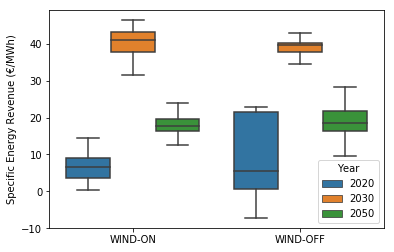

In [7]:
ax1=sns.boxplot(x="Technology type", y="Value", hue="Year", data=data_plot, showfliers = False,order=['WIND-ON','WIND-OFF'])
ax1.set_xlabel('')
ax1.set_ylabel(ylabel='Specific Energy Revenue (€/MWh)')
plt.show()
figure = ax1.get_figure()
figure.savefig('NoSectorCoupling.png', dpi=1000)